# svm

In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
print("버전:", mpl.__version__)
print("설치 위치:", mpl.__file__)
print("설정 위치:", mpl.get_configdir())
print("캐시 위치:", mpl.get_cachedir())

버전: 3.1.0
설치 위치: C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\matplotlib\__init__.py
설정 위치: C:\Users\Affinity\.matplotlib
캐시 위치: C:\Users\Affinity\.matplotlib


In [3]:
font_list = fm.findSystemFonts(fontpaths=None, fontext = 'ttf')
print(len(font_list))

font_list[:15]
f=[f.name for f in fm.fontManager.ttflist]
print(len(font_list))
f[20:30]
[(f.name,f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]
path = 'C:/Windows/Fonts/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=10)

1001
1001


In [4]:
X, y = make_blobs(centers=4, random_state=8) # 난수 생성, 4개의 클러스터
y= y%2
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0",fontproperties=fontprop)
plt.ylabel("특성 1",fontproperties=fontprop)

NameError: name 'make_blobs' is not defined

C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Feature 1')

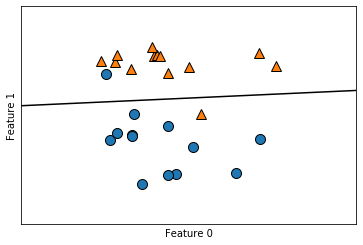

In [54]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1], y )
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0.5, 0, '특성 1 ** 2')

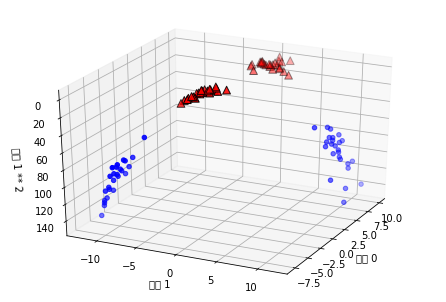

In [45]:
X_new = np.hstack([X,X[:,1:]**2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

ax = Axes3D(figure,elev=-152, azim=-26)

mask= y==0
ax.scatter(X_new[mask,0], X_new[mask,1],X_new[mask,2], c='b')
ax.scatter(X_new[~mask,0], X_new[~mask,1],X_new[~mask,2], c='r',marker='^', 
          cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성 0")
ax.set_ylabel("특성 1")
ax.set_zlabel("특성 1 ** 2")


C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, '특성 1 ** 2')

C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


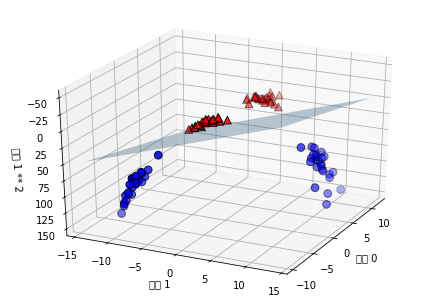

In [46]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(),linear_svm_3d.intercept_
figure = plt.figure()
# 선형 결정 경계 그리기
ax = Axes3D(figure,elev=-152, azim=-26)
xx= np.linspace(X[:,0].min()-2, X[:,0].max()+2, 50 )
yy= np.linspace(X[:,1].min()-2, X[:,1].max()+2, 50 )

XX, YY = np.meshgrid(xx,yy)
ZZ = (coef[0]* XX + coef[1]*YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride = 8, alpha = 0.3)
ax.scatter(X_new[mask, 0],X_new[mask, 1],X_new[mask, 2], c ='b', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask,0], X_new[~mask,1],X_new[~mask,2], c='r',marker='^', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성 0")
ax.set_ylabel("특성 1")
ax.set_zlabel("특성 1 ** 2")

Text(-0.029552224598906662, -0.0879685414955162, '특성 1')

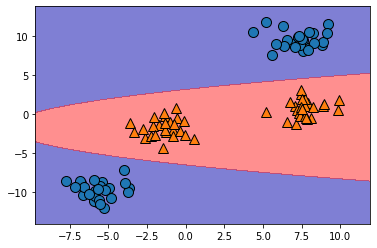

In [47]:
ZZ = YY **2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(),YY.ravel(),ZZ.ravel()])
plt.contourf(XX,YY,dec.reshape(XX.shape), levels=[dec.min(),0,dec.max()],
            cmap=mglearn.cm2,alpha = 0.5)
mglearn.discrete_scatter(X[:,0],X[:,1], y )
ax.set_xlabel("특성 0")
ax.set_ylabel("특성 1")

Text(0, 0.5, '특성 1')

C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


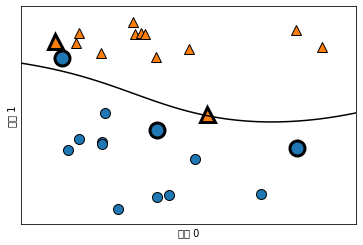

In [48]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
svm= SVC(kernel='rbf', C= 10, gamma = 0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm,X,eps=.5)

# 데이터 포인트 그리기
mglearn.discrete_scatter(X[:,0],X[:,1], y )

sv = svm.support_vectors_

sv_labels = svm.dual_coef_.ravel() > 0 
mglearn.discrete_scatter(sv[:,0],sv[:,1], sv_labels, s= 15, markeredgewidth = 3)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\matplotlib\backe

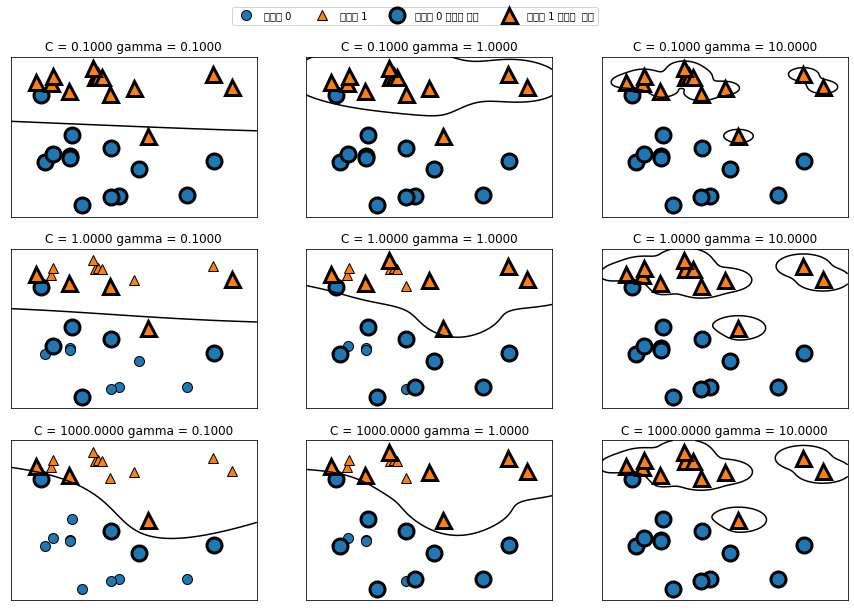

In [52]:
fig, axes = plt.subplots(3,3, figsize = (15,10))

for ax, C in zip(axes, [-1,0,3]):
    for a, gamma in zip(ax, range(-1,2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax =a)
axes[0,0].legend(["클래스 0","클래스 1", "클래스 0 서포트 벡터", "클래스 1 서포트  벡터"],
                ncol = 4, loc=(.9, 1.2))


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svc=SVC()
svc.fit(X_train,  y_train)
print("훈련세트 정확도: {:.2f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test, y_test)))



훈련세트 정확도: 1.00
테스트 세트 정확도: 0.63


C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [60]:
# 특성별 최소값 계산
min_on_training = X_train.min(axis=0)
# 범위 계신
range_on_training = (X_train- min_on_training).max(axis=0)
# 범위 0~1이 됨 
X_train_scaled = (X_train- min_on_training) / range_on_training 
print(X_train_scaled.min(axis=0))
print(X_train_scaled.max(axis=0))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [64]:
# 특성별 최소값 계산
X_test_scaled = (X_test- min_on_training) / range_on_training 
svc=SVC()
svc.fit(X_train_scaled,  y_train)
print("훈련세트 정확도: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test_scaled, y_test)))



훈련세트 정확도: 0.95
테스트 세트 정확도: 0.95


C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# 나이브 베이즈

In [2]:
from numpy import *

def loadDataSet():
    postingList =[
        ['my', 'dog', 'has', 'flea', 'poblem', 'help', 'please'],
        ['maybe','not','take','him','to','dog','park','stupid'],
        ['my','dalmation','is','so','cute','i','love','him'],
        ['stop','posting','stupid','worthless','garbage'],
        ['mr','licks','ate','my','steak','how','to','stop','him'],
        ['quit','buying','worthless','dog','food','stupid']]
    classVec = [0,1,0,1,0,1]
    return postingList, classVec

def createVocabList(dataSet):
    vocabSet = set([])
    for document in dataSet:
        vocabSet = vocabSet | set(document) # dataset의 값을 중복 없게 집합으로 변환
    return list(vocabSet)

In [3]:
loadDataSet()

([['my', 'dog', 'has', 'flea', 'poblem', 'help', 'please'],
  ['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'],
  ['my', 'dalmation', 'is', 'so', 'cute', 'i', 'love', 'him'],
  ['stop', 'posting', 'stupid', 'worthless', 'garbage'],
  ['mr', 'licks', 'ate', 'my', 'steak', 'how', 'to', 'stop', 'him'],
  ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid']],
 [0, 1, 0, 1, 0, 1])

In [4]:
def setOfWords2Vec(vocabList,inputSet): #함수(토큰리스트(사전), 문서)
    returnVec = [0]*len(vocabList)
    for word in inputSet # 문서를 토큰으로 읽음
        if word in vocabList: # 사전과 문서의 토큰과의 비교
            returnVec[vocabList.index(word)] = 1 # 일치하면 사전의 해당 단어 인덱스랑 같은 위치에 1
        else:
            print("the word: {} is not in my Vocabulary".format(word))
    return returnVec


In [5]:
listOfPosts, listClasses = loadDataSet()
myVocabList=createVocabList(listOfPosts)
myVocabList
listOfPosts

[['my', 'dog', 'has', 'flea', 'poblem', 'help', 'please'],
 ['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'],
 ['my', 'dalmation', 'is', 'so', 'cute', 'i', 'love', 'him'],
 ['stop', 'posting', 'stupid', 'worthless', 'garbage'],
 ['mr', 'licks', 'ate', 'my', 'steak', 'how', 'to', 'stop', 'him'],
 ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid']]

In [136]:
setOfWords2Vec(myVocabList,listOfPosts[0])

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0]

In [137]:
def trainNB0(trainMatrix, trainCategory):
    numTrainDocs = len(trainMatrix)
    numWords = len(trainMatrix[0])
    pAbusive = sum(trainCategory)/float(numTrainDocs)
    p0Num = ones(numWords); p1Num = ones(numWords)
    p0Denom = 2.0; p1Denom = 2.0
    for i in range(numTrainDocs):
        if trainCategory[i]==1:
            p1Num += trainMatrix[i]
            p1Denom += sum(trainMatrix[i])
        else:
            p0Num += trainMatrix[i]
            p0Denom += sum(trainMatrix[i])
    p1Vect = log(p1Num/p1Denom)
    p0Vect = log(p0Num/p0Denom)
    return p0Vect,p1Vect,pAbusive

In [138]:
trainMat = []
for postinDoc in listOfPosts:
    trainMat.append(setOfWords2Vec(myVocabList,postinDoc))
p0V,p1V,pAb = trainNB0(trainMat,listClasses)

In [139]:
print("{0}\n\n{1}\n\n{2}\n\n".format(pAb,p0V,p1V))

0.5

[-2.56494936 -2.56494936 -2.56494936 -3.25809654 -2.15948425 -3.25809654
 -3.25809654 -2.56494936 -2.56494936 -2.56494936 -2.56494936 -2.56494936
 -2.56494936 -2.56494936 -3.25809654 -3.25809654 -3.25809654 -2.56494936
 -2.56494936 -2.56494936 -3.25809654 -2.56494936 -3.25809654 -2.56494936
 -2.56494936 -2.56494936 -3.25809654 -1.87180218 -3.25809654 -2.56494936
 -2.56494936 -3.25809654]

[-3.04452244 -3.04452244 -3.04452244 -2.35137526 -2.35137526 -2.35137526
 -1.65822808 -3.04452244 -3.04452244 -3.04452244 -3.04452244 -3.04452244
 -2.35137526 -3.04452244 -2.35137526 -2.35137526 -2.35137526 -2.35137526
 -3.04452244 -1.94591015 -2.35137526 -3.04452244 -2.35137526 -3.04452244
 -3.04452244 -3.04452244 -2.35137526 -3.04452244 -1.94591015 -3.04452244
 -3.04452244 -2.35137526]




In [140]:
def classifyNB(vec2Classify, p0Vec, p1Vec, pClass1):
    p1 = sum(vec2Classify * p1Vec) + log(pClass1)
    p0 = sum(vec2Classify * p0Vec) + log(1.0 - pClass1)
    if p1 > p0:
        return 1
    else: 
        return 0


In [155]:
def testingNB():
    listOfPosts, listClasses = loadDataSet()
    testEntry= ['love','my','dalmation','jy']
    thisDoc = array(setOfWords2Vec(myVocabList,testEntry))
    print("{} classified as {}".format(testEntry,classifyNB(thisDoc,p0V,p1V,pAb)))
    testEntry = ['stupid','garbage']
    thisDoc = array(setOfWords2Vec(myVocabList,testEntry))
    print("{} classified as {}".format(testEntry,classifyNB(thisDoc,p0V,p1V,pAb)))
    

In [156]:
testingNB()

the word: jy is not in my Vocabulary
['love', 'my', 'dalmation', 'jy'] classified as 0
['stupid', 'garbage'] classified as 1


# 분류기

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [147]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color= 'orange', label='ROC')
    plt.plot([0,1],[0,1],color = 'darkblue', linestyle='--')
    plt.xlabel('False')
    plt.xlabel('True')
    plt.title("roc")
    plt.legend()
    plt.show()
    

In [148]:
data_X, class_label = make_classification(n_samples=1000, n_classes=2, weights=[1,1],random_state=1)
trainX, testX, trainy, testy = train_test_split(data_X, class_label, test_size=0.3,random_state=1)

model = KNeighborsClassifier()
model.fit(trainX,trainy)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [150]:
probs = model.predict_proba(testX)
probs = probs[:,1]

roc = roc_curve(testy, probs)
print('roc:{}'.format(roc))
auc = roc_auc_score(testy,probs)
print('auc: %.2f'%auc)


roc:(array([0.        , 0.01408451, 0.0915493 , 0.18309859, 0.33098592,
       0.5       , 1.        ]), array([0.        , 0.2721519 , 0.65189873, 0.89873418, 0.98101266,
       0.99367089, 1.        ]), array([2. , 1. , 0.8, 0.6, 0.4, 0.2, 0. ]))
auc: 0.91


In [151]:
fpr,tpr,thresholds = roc_curve(testy, probs)

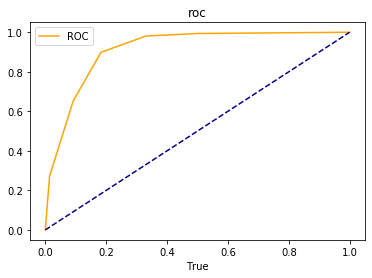

In [152]:
plot_roc_curve(fpr,tpr)

In [159]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
iris = load_iris()
KNN = KNeighborsClassifier()
scores = cross_val_score(KNN,iris.data,iris.target)
print("교차검증 점수 ",scores)


교차검증 점수  [0.98039216 0.98039216 1.        ]


C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [160]:
socres = cross_val_score(KNN,iris.data,iris.target, cv =5)
print("교차검증 점수 ",scores)
print("교차검증 점수 ",scores)


교차검증 점수  [0.98039216 0.98039216 1.        ]


In [161]:
print("교차검증 점수: {:.2f} ".format(scores.mean()))


교차검증 점수: 0.99 


In [162]:
from sklearn.model_selection import cross_validate
res = cross_validate(KNN,iris.data,iris.target,cv=5,return_train_score=True)
display(res)

{'fit_time': array([0.        , 0.        , 0.00099564, 0.00099778, 0.        ]),
 'score_time': array([0.00199223, 0.00099683, 0.00095963, 0.0009985 , 0.00099659]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.975     , 0.975     , 0.96666667])}

In [163]:
from sklearn.model_selection import LeaveOneOut
loo =LeaveOneOut()
cprint("교차 검증 분할 횟수",len(scores))
print("평균 정확도: {:.2f} ".format(scores.mean()))


교차 검증 분할 횟수 150
평균 정확도: 0.97 


In [169]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(KNN,iris.data,iris.target,cv=ShuffleSplit)
print("교차검증 점수 ",scores)


AttributeError: 'numpy.ndarray' object has no attribute '_iter_indices'

# grid search

In [168]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0) # 앞의 두 객체는 자료, 뒤에 두 개는 라벨
print("훈련 세트의 크기: {} 테스트 세트의 크기: {}".format(X_train.shape[0],X_test.shape[0]))
best_score = 0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm = SVC(gamma=gamma,C=C)
        svm.fit(X_train,y_train)
        score = svm.score(X_test,y_test)
        if score > best_score:
            best_score = score
            best_parameter = {'C': C, 'gamma': gamma}
print("최고 점수:{:.2f}".format(best_score))
print("최적 매개변수:",best_parameter)


훈련 세트의 크기: 112 테스트 세트의 크기: 38
최고 점수:0.97
최적 매개변수: {'C': 100, 'gamma': 0.001}


In [171]:
# 검증 세트 추가
from sklearn.svm import SVC
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state = 0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state = 1) # 훈련세트에서 검증세트 나눔
print("훈련 세트의 크기: {} 테스트 세트의 크기: {} 검증  세트의 크기: {}".format(X_train.shape[0],X_test.shape[0],X_valid.shape[0]))

best_score = 0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm = SVC(gamma=gamma,C=C)
        svm.fit(X_train,y_train)
        score = svm.score(X_valid,y_valid)
        if score > best_score:
            best_score = score
            best_parameter = {'C': C, 'gamma': gamma}
print("최고 점수:{:.2f}".format(best_score))
print("최적 매개변수:",best_parameter)


훈련 세트의 크기: 84 테스트 세트의 크기: 38 검증  세트의 크기: 28
최고 점수:0.96
최적 매개변수: {'C': 10, 'gamma': 0.001}


In [176]:
svm = SVC(**best_parameter)
svm.fit(X_trainval,y_trainval)
test_score = svm.score(X_test, y_test)
print("검증세트에서 최고 점수:{:.2f}".format(best_score))
print("최적 매개변수:",best_parameter)
print("치적 매개변수에서 테스트세트 최고 점수:{:.2f}".format(test_score))


검증세트에서 최고 점수:0.96
최적 매개변수: {'C': 10, 'gamma': 0.001}
치적 매개변수에서 테스트세트 최고 점수:0.92
